<div style="text-align:center">
    <h1>
        On-policy Monte Carlo Control
    </h1>
</div>
<br>

<div style="text-align:center">
    <p>
        In this notebook we are going to implement one of the two major strategies that exist when learning a policy by interacting with the environment, called on-policy learning. The agent will perform the task from start to finish and based on the sample experience generated, update its estimates of the q-values of each state-action pair $Q(s,a)$.
    </p>
</div>

<br><br>
<div style="text-align:center">
    <b>This notebook belongs to section 4 of the course "Reinforcement Learning: beginner to master".</b>
    <br><br>
    <a href="https://www.udemy.com">Reinforcement Learning: beginner to master</a> (English)
    <br>
    <a href="https://www.udemy.com">Reinforcement Learning: de principiante a maestro</a> (Spanish)
</div>

<br>

<table style="width:35%">
  <tr style="background-color: transparent">
    <td style="width: 45%">
        <a target="_parent" href="https://www.evlabs.io" style="float: center">
            <img src="img/evlabs-square.png" width="75"/>
        </a> 
    </td>
    <td valign="bottom">
        <a target="_parent" href="https://www.youtube.com/channel/UCksRNSzWuMV5IfdrPlglqqw">
            <img src="img/YouTube.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://www.linkedin.com/company/evlabs">
            <img src="img/LinkedIn.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://twitter.com/evelabs">
            <img src="img/Twitter.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://github.com/escape-velocity-labs/">
            <img src="img/GitHub.png" width="35"/>
        </a> 
    </td>

  </tr>
  <tr style="background-color: transparent">
    <th style="text-align: center; width: 70%">Escape Velocity Labs</th>
  </tr>

</table>

<br>

## Import the necessary software libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

## Initialize the environment

In [2]:
env = Maze()

D:\Users\apytl\AppData\Anaconda3\envs\bmrl\lib\site-packages\pyglet\image\codecs\wic.py:406: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


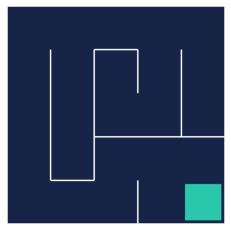

In [3]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

In [4]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


## Define value table $Q(s, a)$

#### Create the $Q(s, a)$ table

In [5]:
#to store our estimates of the expected retur after taking each action in each state
"""We are going to create a 5x5x4 table filled with zeroes, 5x5, because the
task has 25 possible states, each combination of row and column, and 4, because in each state
we have 4 available actions."""

action_values = np.zeros((5,5, 4))

#### Plot $Q(s, a)$

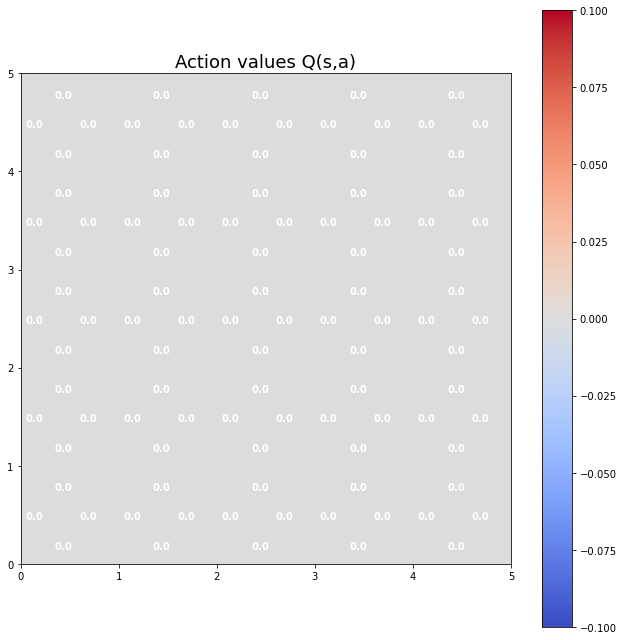

In [6]:
plot_action_values(action_values)

In [7]:
%%latex
And here we have it, each square inside this table represents one of the states of the task and each triangle inside that square represents the estimated value of the corresponding action.

For example, in this state, this triangle up here represents the value of taking the moving up action in the state.

Zero zero. This triangle represents the value of moving down and so on and so forth for each action in each

state.

<IPython.core.display.Latex object>

## Define the policy $\pi(s)$

#### Create the policy $\pi(s)$

In [8]:
# epsilon-greedy policy

def policy(state, epsilon=0.2):
    if np.random.random() < epsilon:
        return np.random.choice(4)
    else:
        av =  action_values[state]
        return np.random.choice(np.flatnonzero(av==av.max()))
    
    #av==av.max() action that has highest q-value
    #np.flatnonzero pick the elt that do have the highest value
    #random.choice choose one of them randomly
    

In [20]:
av =  action_values[(0,0)]
av = np.array([0., .5, .8, 0.3])
av==av.max()
print(np.flatnonzero(av))
print(np.random.choice(np.flatnonzero(av)))

[1 2 3]
1


#### Test the policy with state (0, 0)

In [9]:
action = policy((0,0), epsilon=.5)
print (f"Action taken in state (0, 0): {action} ")

Action taken in state (0, 0): 1 


#### Plot the policy

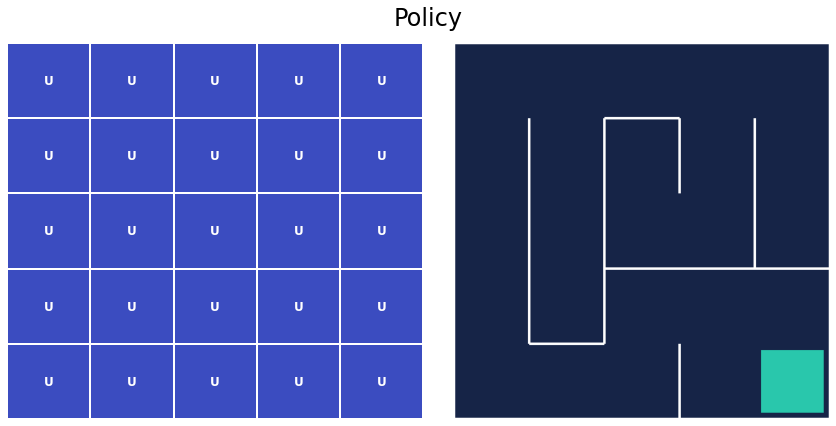

In [10]:
plot_policy(action_values, frame)

## Implement the algorithm


</br></br></br>

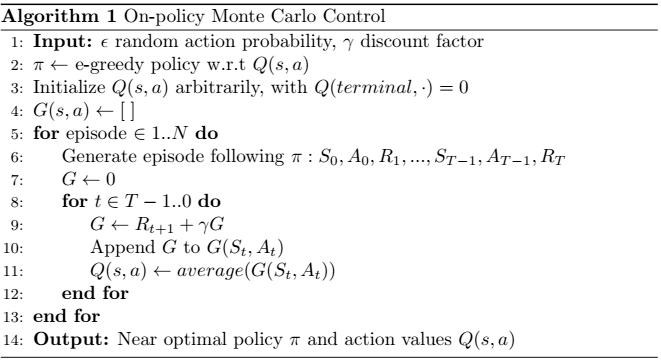


<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>

In [23]:
#on policy means that we're usning the same policy to explore the env and to participate in the learning process
def on_policy_mc_control(policy, action_values, episodes, gamma=.99, epsilon=0.2):
    
    sa_returns = {} #action pairs
    
    for episode in range(1, episodes + 1):
        state = env.reset() # to obtain the first state observation
        done =  False # to check is the task is over or not--> agnet found the exit
        transitions = []
        
        while not done:
            action = policy(state, epsilon)
            #no more simulation like in the DP, here the agent will pick the action and face the csq
            next_state, reward, done, _ = env.step(action)
            transitions.append([state, action, reward])
            state = next_state
            
        
        G = 0
        
        for state_t, action_t, reward_t in reversed(transitions):
            G = reward_t + gamma * G
            
            if not (state_t, action_t) in sa_returns:
                sa_returns[(state_t, action_t)] = []
            sa_returns[(state_t, action_t)].append(G)
            action_values[state_t][action_t] = np.mean(sa_returns[(state_t, action_t)])
         

In [24]:
on_policy_mc_control(policy, action_values, episodes=10000)

## Show results

#### Show resulting value table $Q(s, a)$

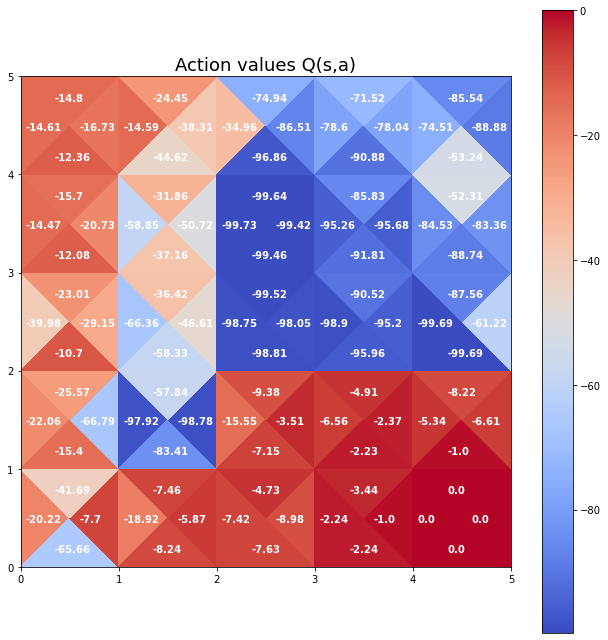

In [25]:
plot_action_values(action_values)

In [ ]:
%%latex
actions with higher q-values are the one that lead us closer to the goal

#### Show resulting policy $\pi(\cdot|s)$

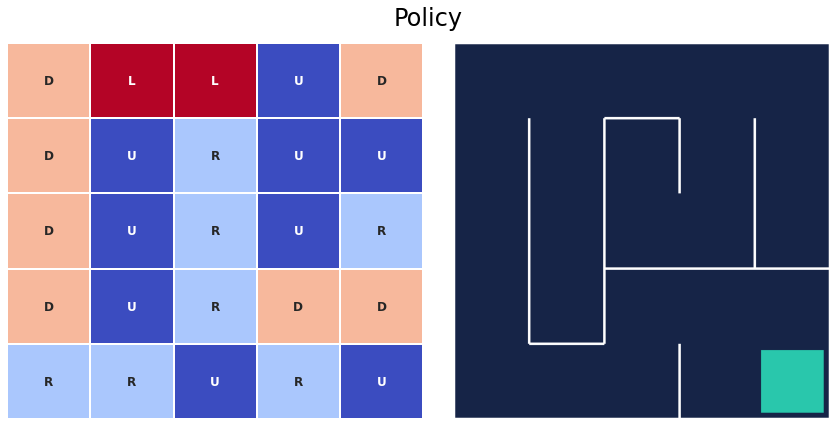

In [26]:
plot_policy(action_values, frame)

In [33]:

##As we can see, the policy will advise the agent to move down

#### Test the resulting agent

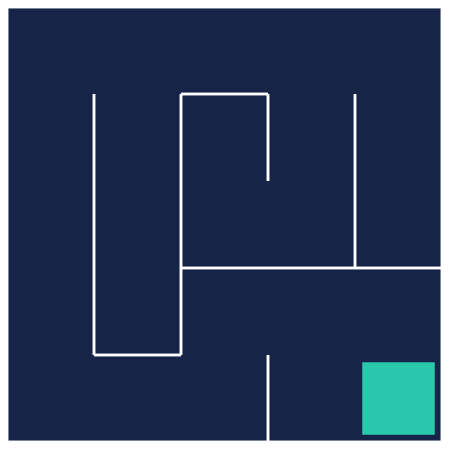

In [27]:
test_agent(env, policy)

In [32]:
## As we can see, it's capable of finding the exit optimaly

## Resources

[[1] Reinforcement Learning: An Introduction. Ch. 4: Dynamic Programming](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf)